In [1]:
import sys
sys.path.append('../backend/')
from functions import *

import seaborn as sns
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
#import plotly.express as px

C:\Users\scottn\Anaconda3\envs\SJU_DS\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LinearRegression from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
race_date=date(2024, 3, 14)
units='km'
#speed=mins_to_meters(m=6, s=15)
speed=minskm_to_meters(m=3, s=53)
result=get_calendar(date=race_date, weeks=12, speed=speed, race_dist=13.1, units=units)

print('raw level: ', result[1])
print('dist level: ', result[2])
print('z2: ', pace_to_str(result[10], unit=units))
print('mp: ', pace_to_str(result[9], unit=units))
print('hmp: ', pace_to_str(result[8], unit=units))
print('10k: ', pace_to_str(result[7], unit=units))
print('5k: ', pace_to_str(result[6], unit=units))
result[0].to_csv('kmHalf.csv', index=False)
#[['date', 'day_desc', 'week', 'phase', 'distance', 'dist_km', 'run_type', 'run_name', 'pace', 'run_desc']]\


raw level:  8.172970329423109
dist level:  [8.172970329423109]
z2:  5:08/km
mp:  4:14/km
hmp:  3:53/km
10k:  3:43/km
5k:  3:39/km


In [7]:
df=pd.read_csv('kmHalf.csv')

In [8]:
df

,date,day_code,day_desc,week,phase,weekly_mileage,runs_per_week,distance,run_type,run_desc,run_name,pace,dist_km
0,2023-12-25,0,Mon,1,base,18.000000,4,0.00,rest,This is a rest day. Prioritize relaxation and ...,Rest Day,-,0.00
1,2023-12-26,1,Tues,1,base,18.000000,4,3.10,easy,This run should be easy enough that you could ...,Easy Day,5:08/km,4.99
2,2023-12-27,2,Wed,1,base,18.000000,4,5.75,workout,1 mile warm up followd by 6 reps of 800m with ...,6 x 800m,4:14/km,9.25
3,2023-12-28,3,Thurs,1,base,18.000000,4,3.10,easy,This run should be easy enough that you could ...,Easy Day,5:08/km,4.99
4,2023-12-29,4,Fri,1,base,18.000000,4,0.00,rest,This is a rest day. Prioritize relaxation and ...,Rest Day,-,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2024-03-10,6,Sun,11,taper,37.736931,5,6.10,easy,This run should be easy enough that you could ...,Easy Day,5:08/km,9.82
77,2024-03-11,0,Mon,12,taper,21.563960,4,0.00,rest,This is a rest day. Prioritize relaxation and ...,Rest Day,-,0.00
78,2024-03-12,1,Tues,12,taper,21.563960,4,4.80,easy,The majority of this run should be at your usu...,Easy + Strides,5:08/km,7.72
79,2024-03-13,2,Wed,12,taper,21.563960,4,4.80,easy,The majority of this run should be at your usu...,Easy + Strides,5:08/km,7.72


In [5]:
df.groupby(['week'])['distance'].sum()

week
1     17.95
2     30.15
3     41.90
4     53.95
5     53.85
6     53.75
7     54.10
8     54.00
9     54.05
10    53.95
11    37.85
12    27.50
Name: distance, dtype: float64

In [3]:
result[0].groupby(['week'])['distance'].sum().reset_index().to_csv('CoraHalf_Volume.csv', index=False)

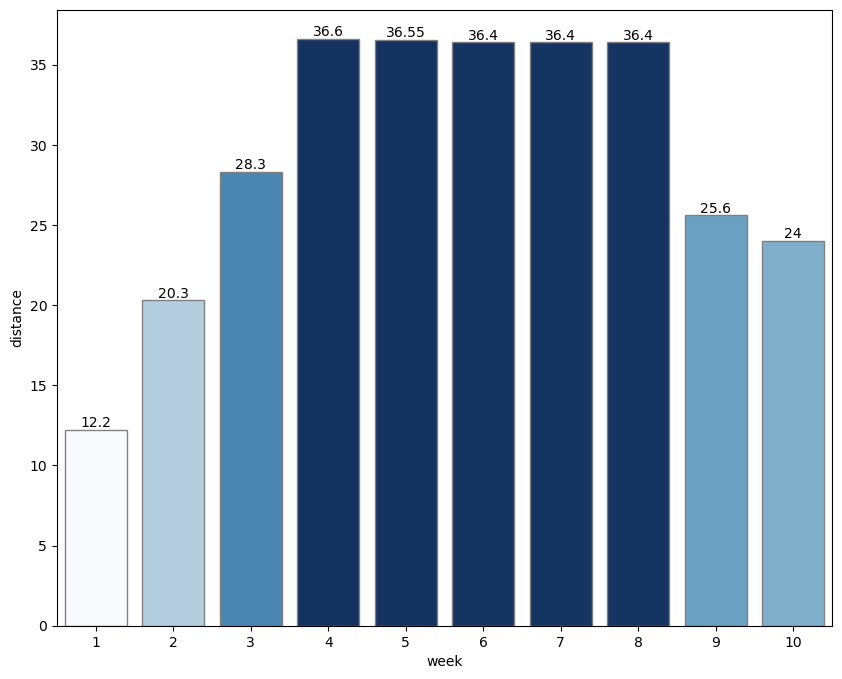

In [4]:
df_vol = result[0].groupby(['week'])['distance'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_vol, x='week', y='distance', edgecolor='grey', 
            palette=plt.cm.ScalarMappable(cmap='Blues').to_rgba(df_vol['distance']), ax=ax)

ax.bar_label(ax.containers[0]);

plt.savefig('CoraHalf_Volume.jpg')

# DB Connection

In [6]:
import psycopg2

In [7]:
import os
from dotenv import load_dotenv

load_dotenv('../pg.env')

True

In [ ]:
def get_data(env_path, query):
    load_dotenv(env_path)
    #read in sql query
    f=open(query)
    query_main=f.readlines()
    f.close()
    ### Setup snowflake connector
    ctx = snowflake.connector.connect(
        user=os.getenv('uid_snow'), 
        password=os.getenv('pwd_snow'), 
        account=os.getenv('account_snow'))
    cs = ctx.cursor()
    cs.execute('USE DATABASE BANNER_DB')
    cs.execute('USE SCHEMA BANNER_LND')
    cs.execute("".join(query_main))
    ### Turn into pandas data frame
    D = cs.fetchall()
    col_nms=[x.name for x in cs.description]
    df=pd.DataFrame(D)
    df.columns=col_nms
    ### Close connections
    cs.close()
    ctx.close()    
    return df

In [36]:
ENDPOINT="mc-db.curuzcat1uwx.us-east-2.rds.amazonaws.com"
PORT="5432"
USER="mydbuser"
REGION="us-east-2c"
DBNAME="postgres"

ENDPOINT="mc-db.curuzcat1uwx.us-east-2.rds.amazonaws.com"
PORT="5432"
USER="scottn_sql"
DBNAME="postgres"
PWD='299Adelphist..'

In [6]:
try:
    conn = psycopg2.connect(host=os.getenv('ENDPOINT'), port=os.getenv('PORT'), database=os.getenv('DBNAME'), user=os.getenv('USER'), password=os.getenv('PWD'))
    cur = conn.cursor()
    cur.execute("""SELECT * FROM USERS""")
    query_results = cur.fetchall()
    col_nms=[x.name for x in cur.description]
    df=pd.DataFrame(query_results)
    df.columns=col_nms
except Exception as e:
    print("Database connection failed due to {}".format(e))  
#cur.close()
#conn.close()

df

,user_id,first_name,last_name,email,pwd,terms,created
0,1,Nicholas,Scott,nickxscott@gmail.com,$2b$12$NGDOlvgqFhj6iS3CsBqJOuoEa0lcByo5UDqHAhX...,True,2024-01-28 19:28:20.864446


In [38]:
cur.description

(Column(name='user_id', type_code=20),
 Column(name='first_name', type_code=1043),
 Column(name='last_name', type_code=1043),
 Column(name='email', type_code=25),
 Column(name='pwd', type_code=25),
 Column(name='terms', type_code=16),
 Column(name='created', type_code=1114))

In [39]:
cur.close()
conn.close()

In [26]:
conn = psycopg2.connect(host=ENDPOINT, port=PORT, database='postgres', user='scottn_sql', password='299Adelphist..')
cur = conn.cursor()
cur.execute("TRUNCATE TABLE USERS")
conn.commit()

In [24]:
cur.description

In [29]:
conn = psycopg2.connect(host=ENDPOINT, port=PORT, database='postgres', user='scottn_sql', password='299Adelphist..')
cur = conn.cursor()
cur.execute("INSERT INTO USERS (USER_ID, FIRST_NAME, LAST_NAME, EMAIL, PWD, CREATED) VALUES (DEFAULT, 'New', 'Name', 'email', 'testpw', NOW());")
conn.commit()

In [30]:
cur.close()
conn.close()

In [17]:
print("INSERT INTO USERS (USER_ID, FIRST_NAME, LAST_NAME, EMAIL, PWD, CREATED) VALUES (DEFAULT, 'New', 'Name', 'email', 'testpw', NOW());")

INSERT INTO USERS (USER_ID, FIRST_NAME, LAST_NAME, EMAIL, PWD, CREATED) VALUES (DEFAULT, 'New', 'Name', 'email', 'testpw', NOW());


In [32]:
last = 'scott'
first = 'nick'
email = 'nickxscott@gmail.com'
pwd = 'test_pwd'
terms = True

In [35]:
print("INSERT INTO USERS (USER_ID, FIRST_NAME, LAST_NAME, EMAIL, PWD, CREATED) \
        VALUES (DEFAULT, " +"'"+  first +"', '" + last +"', '"+ email +"', '"+ pwd +"', true, NOW());")

INSERT INTO USERS (USER_ID, FIRST_NAME, LAST_NAME, EMAIL, PWD, CREATED)         VALUES (DEFAULT, 'nick', 'scott', 'nickxscott@gmail.com', 'test_pwd', true, NOW());


In [11]:
username='nickxscott@gmail.com'

In [14]:
def get_user(username): 
    conn = psycopg2.connect(host=os.getenv('ENDPOINT'), 
                            port=os.getenv('PORT'), 
                            database=os.getenv('DBNAME'), 
                            user=os.getenv('USER'), 
                            password=os.getenv('PWD'))
    cur = conn.cursor()
    cur.execute("SELECT * \
                FROM USERS \
                    WHERE EMAIL = \'" + username + "'")
    query_results = cur.fetchall()
    col_nms=[x.name for x in cur.description]
    df=pd.DataFrame(query_results)
    df.columns=col_nms
    return df

In [15]:
df, query_results=get_user(username=username)

In [19]:
for i in query_results[0]:
    print(i)

1
Nicholas
Scott
nickxscott@gmail.com
$2b$12$NGDOlvgqFhj6iS3CsBqJOuoEa0lcByo5UDqHAhXx2I7bKGU2fOvwG
True
2024-01-28 19:28:20.864446


In [102]:
if df_user[0]:
    print('true')

true


In [41]:
if get_user('nickxscott@gmail.com'):
    print('user exists already')
else:
    print('user doesnt exist yet')

user exists already


In [54]:
if False:
    print('option 1')
else:
    print('option 2')

option 2


In [104]:
username='nickxscott@gmail.com'

In [105]:
conn = psycopg2.connect(host=os.getenv('ENDPOINT'), 
                            port=os.getenv('PORT'), 
                            database=os.getenv('DBNAME'), 
                            user=os.getenv('USER'), 
                            password=os.getenv('PWD'))
cur = conn.cursor()
cur.execute("SELECT * \
            FROM USERS \
            WHERE EMAIL = \'" + username + "'")
query_results = cur.fetchall()

In [110]:
len(query_results)

1

In [73]:
if df.email.any():
    print(True)

True


In [25]:
from flask_login import UserMixin, login_user, login_required, logout_user, current_user

class User(UserMixin):

    """Custom User class."""
    def __init__(self, user_id, first, last, email):
        self.id = user_id
        self.first = first
        self.last = last
        self.email = email
        
    @staticmethod
    def get(user_id):
        conn = psycopg2.connect(host=os.getenv('ENDPOINT'), 
                            port=os.getenv('PORT'), 
                            database=os.getenv('DBNAME'), 
                            user=os.getenv('USER'), 
                            password=os.getenv('PWD'))
        cur = conn.cursor()
        cur.execute("SELECT * \
                    FROM USERS \
                        WHERE USER_ID = \'" + user_id + "'")
        query_results = cur.fetchall()
        col_nms=[x.name for x in cur.description]
        df=pd.DataFrame(query_results)
        df.columns=col_nms
        return User(user_id=user_id, last=first, first=last, email=email)

In [23]:
user_id = 1
first='nick'
last='scott'
email='nickxscott@gmail.com'

user=User(user_id=user_id, first=first, last=last, email=email)

In [28]:
user_id='1'
User.get(user_id).email

'nickxscott@gmail.com'

In [3]:
for i in range(0, 10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [4]:
def createList(r1, r2):
    return [item for item in range(r1, r2+1)]

In [5]:
createList(0,10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [9]:
def createList(r1, r2):
    temp = [item for item in range(r1, r2+1)]
    result = []
    for n in temp:
        if n < 10:
            result.append('0'+str(n))
        else:
            result.append(str(n))
    return result

In [11]:
createList(0,12)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [12]:
from datetime import datetime, date, timedelta

In [14]:
date('2024-02-28')

TypeError: an integer is required (got type str)